##弦の振動

---



方針：弦の振動を表す、波動方程式を有限差分法、（具体的には逐次法）を用いて時、波の変化をアニメーションを用いて表す。その後、初期値を変えた場合と初期条件を変えた場合に波がどう変化するのか調べる。その後、CFL条件を満たさず、エラーが起きる場合を考察する。

以下、弦の振動を表す方程式(波動方程式)を

\begin{equation}
\frac{\partial^2u(x,t)}{\partial t^2} = c^2 \frac{\partial^2u(x,t)}{\partial x^2}
\end{equation}

と表す。cは波の速度,　xは位置,　uが変位,　tが時間を表している。
弦の長さをLとした時,
\begin{equation}
t<0　, 　0<x<L
\end{equation}
となることに注意する。

2024年1月15日ChatGPTに弦の振動を表す波動方程式のアニメーションを作成してくださいと聞いた結果

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

In [ ]:
def 波のシミュレーション(t0, tM, M, x0, xN, N, ux0, uxN, A):
    dt = (tM - t0) / M
    dx = (xN - x0) / N
    a = (dt / dx) ** 2

    # 変数の初期化
    u = np.zeros([M + 1, N + 1])

    # 初期条件1 (t=0)
    for xi in range(N + 1):
        u[0, xi] = A * (xi * dx) * (1 - xi * dx)

    # 初期条件2 (t=dt)
    u[1, 0] = 0
    u[1, N] = 0
    for xi in range(1, N):
        u[1, xi] = u[0, xi] + dt * 0 + a / 2 * (u[0, xi + 1] - 2 * u[0, xi] + u[0, xi - 1])

    # 差分解 (t=2*dt~M*dt)
    for ti in range(1, M):
        u[ti + 1, 0] = ux0
        u[ti + 1, N] = uxN

        for xj in range(1, N):
            u[ti + 1, xj] = 2 * u[ti, xj] - u[ti - 1, xj] + a * (u[ti, xj + 1] - 2 * u[ti, xj] + u[ti, xj - 1])

    return u

def 波のアニメーション(u, x0, xN, M, tM):
    x = np.linspace(x0, xN, u.shape[1])

    fig, ax = plt.subplots(figsize=(6, 4))

    def update_func(i):
        ax.clear()
        ax.plot(x, u[i, :], color='blue')
        ax.scatter(x, u[i, :], color='blue')
        ax.set_ylim(np.min(u), np.max(u))
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('u', fontsize=12)
        ax.set_title('Time: ' + '{:.2f}'.format(tM * i / M))

    ani = FuncAnimation(fig, update_func, frames=M, interval=100, repeat=True)

    return ani

# シミュレーションのパラメータ
t0 = 0 # シュミレーションの開始時間
tM = 4 #シュミレーションの終了時間
M = 100 #時間方向の分割数
x0 = 0 # 空間の開始位置
xN = 1 # 空間の終了位置
N = 20 #空間の分割数
ux0 = 0  # 境界条件
uxN = 0  # 境界条件
A = 2  # 初期条件の式の振幅

# シミュレーション実行
u_result = 波のシミュレーション(t0, tM, M, x0, xN, N, ux0, uxN, A)

# 結果をアニメーション化
アニメーション結果 = 波のアニメーション(u_result, x0, xN, M, tM)

# アニメーションを表示
HTML(アニメーション結果.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

##アニメーションからわかること
x=0.5を中心に左右対称に波が動いていることがわかる。
また最大到達点と最低到達点も対称になっている。

##空間の終了位置を4にし、時間方向の分割数を100から400に、空間方向の分割数を20から80にした結果

初期値を変更した際に波がどう変化するのかを確認する

In [ ]:
t0 = 0
tM = 15
M = 400
dt = (tM - t0) / M
x0 = 0
xN = 4
N = 80
ux0 = 0
uxN = 0
A = 2
# シミュレーション実行
u_result = 波のシミュレーション(t0, tM, M, x0, xN, N, ux0, uxN, A)

# 結果をアニメーション化
アニメーション結果 = 波のアニメーション(u_result, x0, xN, M, tM)

# アニメーションを表示
HTML(アニメーション結果.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

## 2024年1月15日ChatGPTにこのアニメーションからわかる波形について解説してくださいと聞いた結果
アニメーションは、弦の時間発展に伴う振動の変化を表しています。
弦は初期条件から始まり、時間が経つにつれて波が伝播していく様子が観察できます。
境界条件により両端が固定されているため、波は反射せずに両端で消失します。
弦の振動が時間とともにどのように進展していくかが視覚的に確認できます。

考察：時間が経過し端に近づくにつれて、波の振幅が大きくなっているように見える。よって、両端の位置を広げることでさらに振幅を大きくできるのではないかと考えた。

##初期条件を変更した際に波がどのように変化するか調べる

初期条件1を
\begin{equation}
u(x,0) = A \exp\left(-\frac{(x - x_0)^2}{2\sigma^2}\right)
\end{equation}
とする。これはガウシアン関数と呼ばれる。
ここで、Aは振幅は波包の中心位置、σは波包の幅である。


In [ ]:
def 波のシミュレーション2(t0, tM, M, x0, xN, N, ux0, uxN, A):
    dt = (tM - t0) / M
    dx = (xN - x0) / N
    a = (dt / dx) ** 2

    # 変数の初期化
    u = np.zeros([M + 1, N + 1])

    # 初期条件1 (t=0)
    x_mid = (xN - x0) / 2
    sigma = 0.1  # ガウシアン波の幅
    for xi in range(N + 1):
        u[0, xi] = A * np.exp(-((xi * dx - x_mid) / sigma)**2)

    # 初期条件2 (t=dt)
    u[1, 0] = 0
    u[1, N] = 0
    for xi in range(1, N):
        u[1, xi] = u[0, xi] + dt * 0 + a / 2 * (u[0, xi + 1] - 2 * u[0, xi] + u[0, xi - 1])

    # 差分解 (t=2*dt~M*dt)
    for ti in range(1, M):
        u[ti + 1, 0] = ux0
        u[ti + 1, N] = uxN

        for xj in range(1, N):
            u[ti + 1, xj] = 2 * u[ti, xj] - u[ti - 1, xj] + a * (u[ti, xj + 1] - 2 * u[ti, xj] + u[ti, xj - 1])

    return u

# シミュレーションのパラメータ
t0 = 0
tM = 4
M = 100
x0 = 0
xN = 1
N = 20
ux0 = 0
uxN = 0
A = 2

# シミュレーション実行
u_result = 波のシミュレーション2(t0, tM, M, x0, xN, N, ux0, uxN, A)

# 結果をアニメーション化
アニメーション結果 = 波のアニメーション(u_result, x0, xN, M, tM)

# アニメーションを表示
HTML(アニメーション結果.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

##考察
初期条件を変更したことで、波が大きく変わった。この波はガウシアン波と呼ばれガウシアン関数を初期条件としている。
アニメーションでもわかるように波が一点から始まり広がっていくことがわかる。

他にも初期条件を変えることで波の形を変えることができると考えられる。

##aを1より大きくしてCFL条件を満たさなくした場合

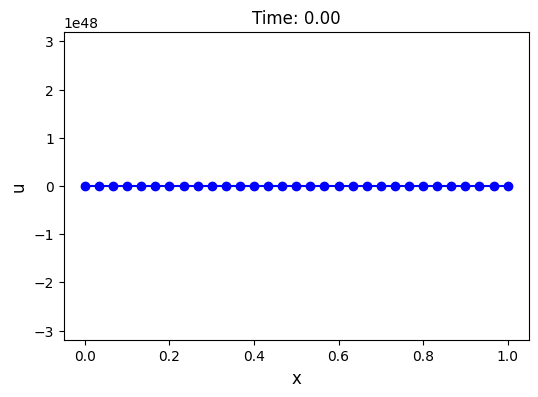

In [ ]:
t0 = 4
tM = 8
M = 100
x0 = 0
xN = 1
N = 30
ux0 = 0
uxN = 0
A = 5  # 初期条件の振幅を大きくする

# シミュレーション実行
u_result = 波のシミュレーション(t0, tM, M, x0, xN, N, ux0, uxN, A)

# 結果をアニメーション化
アニメーション結果 = 波のアニメーション(u_result, x0, xN, M, tM)

# アニメーションを表示
HTML(アニメーション結果.to_jshtml())

aを1より大きくした結果、値が安定性を失いアニメーションでもわかるようにエラーが起きた。


2024年1月15日ChatGPTに係数aとCFL条件について解説してくださいと聞いた結果。:
このaは、差分方程式において時間と空間の間のステップサイズの比率を表します。この係数
aがCourant–Friedrichs–Lewy (CFL) 条件に従っている場合、差分法が安定であると言えます。

CFL条件は通常0≤a≤1とされます。これは、波が伝播する際に差分法が適切に情報を伝達できる条件を示しています。条件が満たされないと、数値的な不安定性が生じ、計算が発散したり不適切な結果が得られる可能性があります。


##感想
今回弦の振動について調べたが、初期値や初期条件を変更することで様々な波形になることがわかった。他にもどのような波形があるのか調べていきたいと思った。